The focus of this notebook is to investigate the problem landscape.
It can also be used to investigate the benefits and disadvantages of GBJ backjumping.

In [1]:
from exact_solver import solve, solve_stp
from problem_generator import generate_problem 

from matplotlib import pyplot as plt
import matplotlib.ticker as mtick

from time import perf_counter

In [2]:
from problem_sets import SIMPLE, BINARY

In [3]:
# syntax for overriding a value.
_ = generate_problem(**{ **SIMPLE, 'variables': 15 } )

Consider the general trend on the big picture

0 100.0 10.0
10 100.0 13.0
20 80.0 19.4
30 40.0 28.4
40 40.0 33.0
50 0.0 42.6
60 0.0 42.2
70 0.0 43.8
80 0.0 42.6
90 0.0 41.4
100 0.0 42.2
0 100.0 12.0
10 80.0 21.0
20 40.0 36.8
30 20.0 44.0
40 0.0 49.4
50 0.0 51.8
60 0.0 45.8
70 0.0 47.4
80 0.0 45.0
90 0.0 49.8
100 0.0 50.6
0 100.0 14.0
10 100.0 20.8
20 60.0 38.8
30 20.0 51.2
40 0.0 51.8
50 0.0 55.4
60 0.0 55.0
70 0.0 52.2
80 0.0 57.4
90 0.0 57.0
100 0.0 63.4
0 100.0 16.0
10 80.0 31.4
20 0.0 60.2
30 0.0 63.4
40 0.0 61.0
50 0.0 57.4
60 0.0 66.6
70 0.0 60.6
80 0.0 67.4
90 0.0 67.0
100 0.0 66.2
0 100.0 18.0
10 40.0 50.0
20 0.0 61.0
30 0.0 66.2
40 0.0 63.0
50 0.0 62.6
60 0.0 64.2
70 0.0 70.6
80 0.0 69.4
90 0.0 75.0
100 0.0 72.2


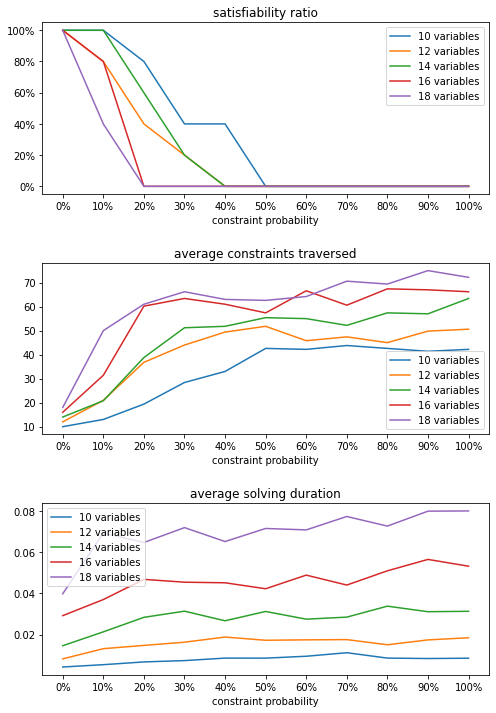

In [5]:
fig, axs = plt.subplots(3, figsize=(8, 12))
fig.subplots_adjust(hspace=0.4)
axs[0].yaxis.set_major_formatter(mtick.PercentFormatter())
axs[0].set_xlabel('constraint probability')
axs[0].set_title('satisfiability ratio')
axs[1].set_xlabel('constraint probability')
axs[1].set_title('average constraints traversed')
axs[2].set_xlabel('constraint probability')
axs[2].set_title('average solving duration')

runs = 5
for variables in range(10, 20, 2):
    x_axis = []
    graph = []
    constraints_traversed = []
    times = []
    for prob in range(0, 101, 10):
        x_axis.append(f'{prob}%')

        cnt = 0
        constr_cnt = 0
        time_sum = 0
        for run in range(runs):
            T = generate_problem(**{ **SIMPLE , 'variables': variables, 'constraint_probability': prob/100})
            stats = {}
            t = perf_counter()
            sat = solve(
                T, backjump=False, stats=stats
            )
            time_sum += perf_counter() - t
            constr_cnt += stats['total']
            if sat: cnt+=1

        graph.append(100*cnt/runs)
        constraints_traversed.append(constr_cnt / runs)
        times.append(time_sum / runs)
        print(prob, cnt/runs * 100, constr_cnt / runs)
    
    axs[0].plot(x_axis, graph, label=f'{variables} variables')    
    axs[1].plot(x_axis, constraints_traversed, label=f'{variables} variables')
    axs[2].plot(x_axis, times, label=f'{variables} variables')

axs[0].legend()
axs[1].legend()
axs[2].legend()

Now zoom in on the interesting part.

6 100.0 12.1
7 95.0 13.55
8 100.0 13.1
9 100.0 13.05
10 100.0 13.4
11 95.0 15.0
12 95.0 15.25
13 90.0 17.15
14 100.0 14.8
15 80.0 17.9
16 85.0 17.55
17 80.0 19.15
18 85.0 18.2
19 80.0 19.15
6 100.0 14.9
7 95.0 17.2
8 95.0 16.5
9 95.0 17.3
10 95.0 19.35
11 95.0 17.45
12 95.0 19.35
13 95.0 20.1
14 90.0 21.9
15 95.0 20.05
16 85.0 22.65
17 70.0 26.8
18 80.0 24.95
19 60.0 27.1
6 100.0 18.85
7 100.0 19.0
8 85.0 22.2
9 95.0 22.25
10 85.0 25.0
11 80.0 27.7
12 90.0 25.65
13 65.0 30.0
14 65.0 32.6
15 80.0 29.65
16 35.0 40.6
17 60.0 34.3
18 50.0 37.95
19 35.0 43.15
6 100.0 22.25
7 95.0 25.85
8 90.0 26.5
9 80.0 30.1
10 85.0 29.1
11 65.0 35.7
12 80.0 32.9
13 80.0 35.1
14 50.0 43.0
15 60.0 39.1
16 50.0 43.7
17 45.0 42.6
18 25.0 47.85
19 40.0 45.4
6 85.0 28.85
7 100.0 28.05
8 80.0 32.85
9 80.0 32.45
10 60.0 41.7
11 85.0 36.7
12 50.0 45.75
13 50.0 46.35
14 45.0 50.6
15 25.0 51.45
16 40.0 48.4
17 25.0 57.8
18 10.0 64.05
19 15.0 59.2


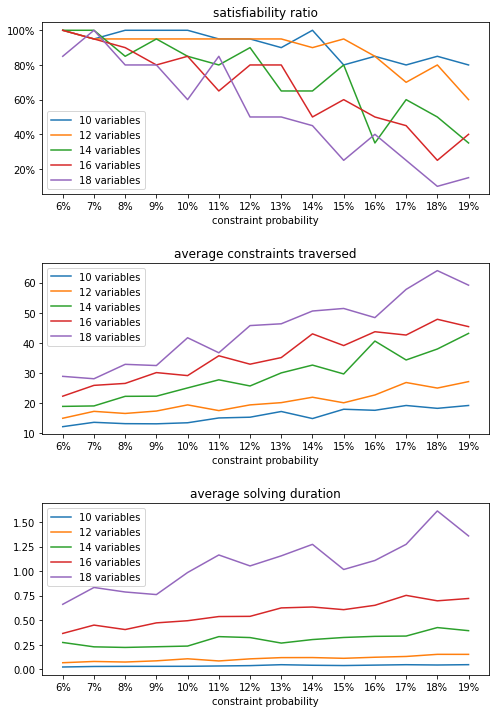

In [11]:
fig, axs = plt.subplots(3, figsize=(8, 12))
fig.subplots_adjust(hspace=0.4)
axs[0].yaxis.set_major_formatter(mtick.PercentFormatter())
axs[0].set_xlabel('constraint probability')
axs[0].set_title('satisfiability ratio')
axs[1].set_xlabel('constraint probability')
axs[1].set_title('average constraints traversed')
axs[2].set_xlabel('constraint probability')
axs[2].set_title('average solving duration')

runs = 20
for variables in range(10, 20, 2):
    x_axis = []
    graph = []
    constraints_traversed = []
    times = []
    for prob in range(6, 20, 1):
        x_axis.append(f'{prob}%')

        cnt = 0
        constr_cnt = 0
        time_sum = 0
        for run in range(runs):
            T = generate_problem(**{ **SIMPLE , 'variables': variables, 'constraint_probability': prob/100})
            stats = {}
            t = perf_counter()
            sat = solve(
                T, stats=stats
            )
            time_sum += perf_counter() - t
            constr_cnt += stats['total']
            if sat: cnt+=1

        graph.append(100*cnt/runs)
        constraints_traversed.append(constr_cnt / runs)
        times.append(time_sum / runs)
        print(prob, cnt/runs * 100, constr_cnt / runs)
    
    axs[0].plot(x_axis, graph, label=f'{variables} variables')    
    axs[1].plot(x_axis, constraints_traversed, label=f'{variables} variables')
    axs[2].plot(x_axis, times, label=f'{variables} variables')

axs[0].legend()
axs[1].legend()
axs[2].legend()

Now let's consider another problem set, such as BINARY.

0 100.0 6.0
20 100.0 8.05
40 100.0 13.9
60 100.0 13.75
80 95.0 20.45
100 75.0 39.3
0 100.0 8.0
20 95.0 17.45
40 95.0 29.6
60 75.0 94.35
80 60.0 128.75
100 10.0 272.4
0 100.0 10.0
20 100.0 18.05
40 70.0 155.45
60 40.0 803.85
80 0.0 650.65
100 0.0 1332.4


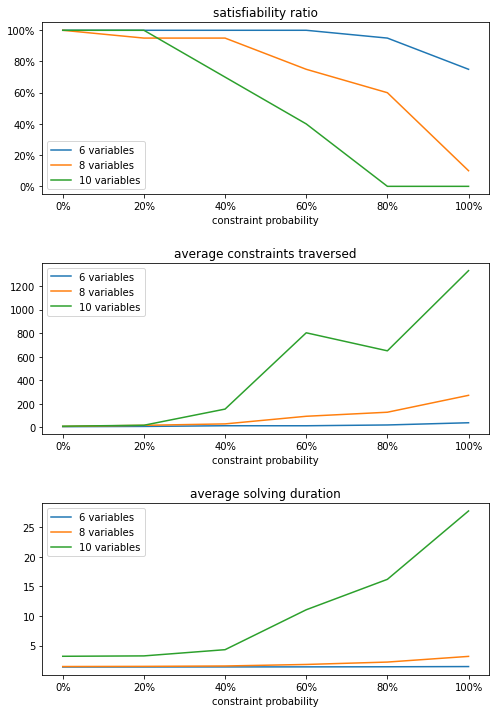

In [15]:
fig, axs = plt.subplots(3, figsize=(8, 12))
fig.subplots_adjust(hspace=0.4)
axs[0].yaxis.set_major_formatter(mtick.PercentFormatter())
axs[0].set_xlabel('constraint probability')
axs[0].set_title('satisfiability ratio')
axs[1].set_xlabel('constraint probability')
axs[1].set_title('average constraints traversed')
axs[2].set_xlabel('constraint probability')
axs[2].set_title('average solving duration')

runs = 20
for variables in range(6, 11, 2):
    x_axis = []
    graph = []
    constraints_traversed = []
    times = []
    for prob in range(0, 101, 20):
        x_axis.append(f'{prob}%')

        cnt = 0
        constr_cnt = 0
        for run in range(runs):
            T = generate_problem(**{ **BINARY , 'variables': variables, 'constraint_probability': prob/100})
            stats = {}
            t = perf_counter()
            sat = solve(
                T, stats=stats
            )
            time_sum += perf_counter() - t
            constr_cnt += stats['total']
            if sat: cnt+=1

        graph.append(100*cnt/runs)
        constraints_traversed.append(constr_cnt / runs)
        times.append(time_sum / runs)
        print(prob, cnt/runs * 100, constr_cnt / runs)
    
    axs[0].plot(x_axis, graph, label=f'{variables} variables')    
    axs[1].plot(x_axis, constraints_traversed, label=f'{variables} variables')
    axs[2].plot(x_axis, times, label=f'{variables} variables')

axs[0].legend()
axs[1].legend()
axs[2].legend()

Btw, what happens if we make the problems much harder to satisfy?
(code copied from BINARY, big picture. changed interval scaling)
(this is also a pseudo-check for backjumping)

0 100.0 6.0 0.0
20 100.0 7.9 0.0
40 65.0 18.1 0.5348178137651821
60 25.0 33.75 1.0530757087965328
80 5.0 40.15 1.4633931583767106
100 0.0 35.8 1.6445248868778286
0 100.0 8.0 0.0
20 65.0 34.15 0.4885393382377955
40 20.0 69.6 1.25084446795918
60 5.0 101.3 1.5843913479542882
80 0.0 66.8 1.8254902227612146
100 0.0 51.0 2.143240454076368
0 100.0 10.0 0.0
20 75.0 56.4 0.5753536930188551
40 0.0 203.35 1.5973182833119668
60 0.0 184.95 1.8388172624762293
80 0.0 84.3 2.1907394393004087
100 0.0 65.0 2.5262768686421944


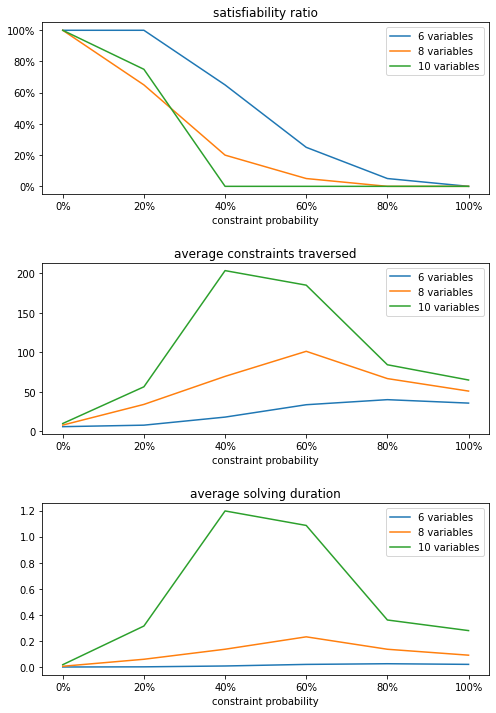

In [17]:
fig, axs = plt.subplots(3, figsize=(8, 12))
fig.subplots_adjust(hspace=0.4)
axs[0].yaxis.set_major_formatter(mtick.PercentFormatter())
axs[0].set_xlabel('constraint probability')
axs[0].set_title('satisfiability ratio')
axs[1].set_xlabel('constraint probability')
axs[1].set_title('average constraints traversed')
axs[2].set_xlabel('constraint probability')
axs[2].set_title('average solving duration')

runs = 20
for variables in range(6, 11, 2):
    x_axis = []
    graph = []
    constraints_traversed = []
    times = []
    for prob in range(0, 101, 20):
        x_axis.append(f'{prob}%')

        cnt = 0
        constr_cnt = 0
        backjump_distance_cnt = 0
        time_sum = 0
        for run in range(runs):
            T = generate_problem(**{ **BINARY , 
                                    'variables': variables, 
                                    'constraint_probability': prob/100,
                                    'scaling_factor': 0.1})
            stats = {}
            t = perf_counter()
            sat = solve(
                T, backjump=True, stats=stats,
            )
            time_sum += perf_counter() - t
            constr_cnt += stats['total']
            if stats['dead'] > 0: backjump_distance_cnt += stats['backjump'] / stats['dead']
            if sat: cnt+=1

        graph.append(100*cnt/runs)
        times.append(time_sum / runs)
        constraints_traversed.append(constr_cnt / runs)
        print(prob, cnt/runs * 100, constr_cnt / runs, backjump_distance_cnt / runs)
    
    axs[0].plot(x_axis, graph, label=f'{variables} variables')    
    axs[1].plot(x_axis, constraints_traversed, label=f'{variables} variables')
    axs[2].plot(x_axis, times, label=f'{variables} variables')

axs[0].legend()
axs[1].legend()
axs[2].legend()